# Loan Data by Prosper Exploration
## by Guwei Zhou

## Preliminary Wrangling

> This project explains the factors that impact loan outcomes by exploring 113937 loan listings.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
df=pd.read_csv('prosperLoanData.csv')

In [5]:
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [6]:
df.head(20)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1


In [7]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])

In [9]:
df.set_index('LoanOriginationDate', inplace=True)

In [10]:
# I am focusing on listings that have loan origination date after July 2009 and the 17 most important variables.
df1=df.query('LoanOriginationDate >= "2009-7-1"')
df2=df1[['ListingKey', 'Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)', 'ProsperScore', 
         'ListingCategory (numeric)', 'BorrowerState', 'Occupation','EmploymentStatus','EmploymentStatusDuration', 
         'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 
         'StatedMonthlyIncome', 'LoanOriginalAmount']]

In [11]:
df2.head()

,ListingKey,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount
LoanOriginationDate,,,,,,,,,,,,,,,,,
2014-03-03,10273602499503308B223C1,36,Current,0.12016,A,7.0,2,CO,Professional,Employed,44.0,680.0,699.0,10266.0,0.18,6125.000000,10000
2012-11-01,0EF5356002482715299901A,36,Current,0.12528,A,9.0,16,GA,Skilled Labor,Employed,113.0,800.0,819.0,30754.0,0.15,2875.000000,10000
2013-09-20,0F023589499656230C5E3E2,36,Current,0.24614,D,4.0,2,MN,Executive,Employed,44.0,680.0,699.0,695.0,0.26,9583.333333,15000
2013-12-24,0F05359734824199381F61D,60,Current,0.15425,B,10.0,1,NM,Professional,Employed,82.0,740.0,759.0,86509.0,0.36,8333.333333,15000
2013-04-18,0F0A3576754255009D63151,36,Current,0.31032,E,2.0,1,KS,Sales - Retail,Employed,172.0,680.0,699.0,1929.0,0.27,2083.333333,3000


In [12]:
#convert data into ordered type.
ordinal_var_dict = {'ProsperRating (Alpha)': ['N/A','HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'LoanStatus': ['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)',
                    'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)', 'Chargedoff',
                    'Defaulted', 'Cancelled']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df2[var] = df2[var].astype(ordered_var)

C:\Users\Guwei\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### What is the structure of your dataset?

> There are 113937 loan listings with 81 variables. Most variables are numeric, with several string variables and two booleon variables. Since July 2009 is the start of subprime mortgage crisis, I will only investigate loans that originated after July 2009. I will also pick the most related 17 columns that I think out of the 81 columns. These columns are: 'ListingKey', 'Term', 
'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory', 'BorrowerState', 'Occupation','EmploymentStatus','EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',  'AvailableBankcardCredit', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount'.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested to see which factors impact loan outcomes.   

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that borrower's credit score lower range and the prosper rating will have the strongest effect on loan's outcome. I also think borrower's APR, stated monthly income, debt to income ratio, employment duration, AvailableBankcardCredit, and loan amount also have impacts on loan's outcome. 

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: LoanStatus.

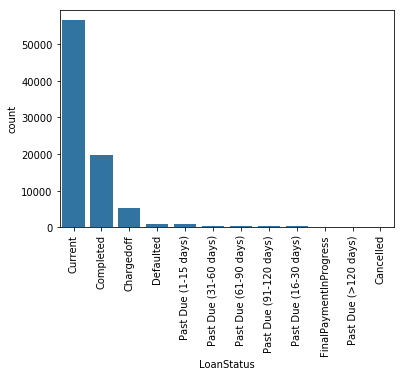

In [13]:
base_color=sb.color_palette()[0]
loan_order=df2['LoanStatus'].value_counts().index
sb.countplot(data=df2, x='LoanStatus', color=base_color, order=loan_order);
plt.xticks(rotation=90);

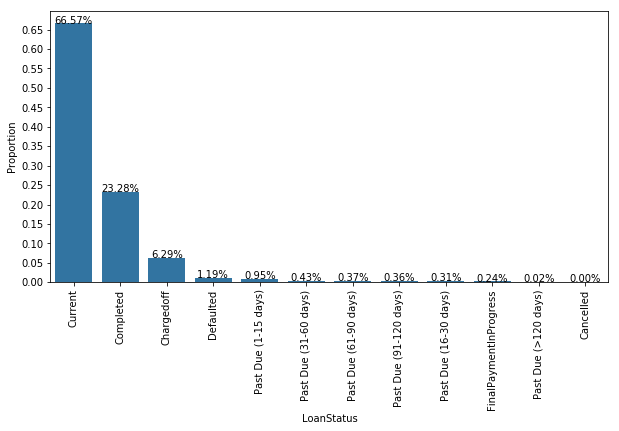

In [14]:
#Since it is difficult to see the exact count, I will convert them into proportions that fall in each category.
n_loan=df2.shape[0]
max_count=df2['LoanStatus'].value_counts().max()
max_prop=max_count/n_loan
#generate the tick mark locations and names
tick_props=np.arange(0, max_prop, 0.05)
tick_names=['{:0.2f}'.format(v) for v in tick_props]
#create the plot
plt.figure(figsize=[10,5])
sb.countplot(data=df2, x='LoanStatus', color=base_color, order=loan_order);
plt.yticks(tick_props*n_loan, tick_names)
plt.ylabel('Proportion');
plt.xticks(rotation=90);
#add annotations
loan_counts=df2['LoanStatus'].value_counts()
locs, labels=plt.xticks()
for loc, label in zip(locs, labels):
    count=loan_counts[label.get_text()]
    plt_string='{:0.2f}%'.format(100*count/n_loan)
    plt.text(loc, count, plt_string, ha='center')

> 66.57% of the loans' status were current, which composes the most part of the loan status. 23.28% of loans are completed. 6.29% of loans were charged off, 1.19% were defaulted, and 2.44% are past due. 

Next, we will look at the first predictor variable of interest: CreditScoreRangeLower.

In [15]:
#find the min and max bin limits
df2['CreditScoreRangeLower'].describe()

count    84984.000000
mean       699.408359
std         47.111880
min        600.000000
25%        660.000000
50%        700.000000
75%        720.000000
max        880.000000
Name: CreditScoreRangeLower, dtype: float64

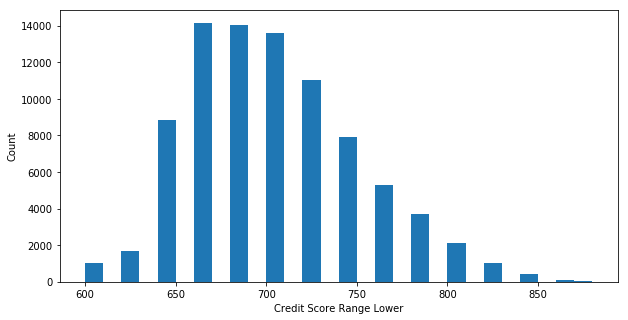

In [16]:
plt.figure(figsize=[10,5])
bin_edges=np.arange(600, 880+10, 10)
plt.hist(data=df2,x='CreditScoreRangeLower', bins=bin_edges);
plt.xlabel('Credit Score Range Lower')
plt.ylabel('Count');

Looks like the distribution of credit score range lower is right skewed, with most lower range credit ratings between 660-710.

Then, we will look at the next important variable: ProsperRating (Alpha). It is an ordinal variable that described the Prosper rating when loans were assigned. 

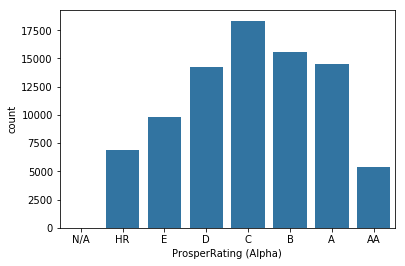

In [17]:
sb.countplot(data=df2, x='ProsperRating (Alpha)', color=base_color);

The distribution of the Prosper rating has an opposite trend with credit score lower range. It has a distribution that skewed to the left, with most ratings concentrated on "C", "B", and "A". Does it mean that borrowers with lower range credit scores of 660-710 have Propser ratings of C through A? We will need to investigate further.

After that, we will look at stated monthly income and debt-to-income ratio together. 

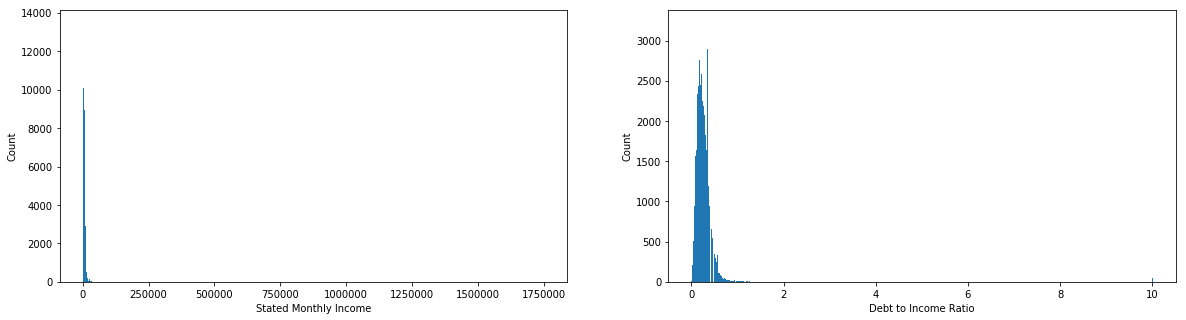

In [18]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
bins1=np.arange(0, df2['StatedMonthlyIncome'].max()+1e3, 1e3)
plt.hist(data=df2, x='StatedMonthlyIncome', bins=bins1);
plt.xlabel('Stated Monthly Income');
plt.ylabel('Count');
plt.subplot(1,2,2)
bins2=np.arange(0, df2['DebtToIncomeRatio'].max()+0.01, 0.01)
plt.hist(data=df2, x='DebtToIncomeRatio', bins=bins2);
plt.xlabel('Debt to Income Ratio');
plt.ylabel('Count');

In [19]:
df2.StatedMonthlyIncome.describe()

count    8.498400e+04
mean     5.929911e+03
std      8.234505e+03
min      0.000000e+00
25%      3.433333e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [20]:
df2.DebtToIncomeRatio.describe()

count    77677.000000
mean         0.258738
std          0.318694
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

From the figures above, we can see that both monthly income and debt to income ratio have long tail in the right side. There are strong outliers on the right side. I will explore them further. 

In [21]:
outliers=((df2['StatedMonthlyIncome'] > 20000) | (df2['DebtToIncomeRatio'] > 1.0))
print(outliers.sum())
df2.loc[outliers, :]

1268


,ListingKey,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount
LoanOriginationDate,,,,,,,,,,,,,,,,,
2013-02-05,101735700321773921526BF,36,Current,0.35356,HR,2.0,1,NY,Other,Other,68.0,700.0,719.0,4465.0,9.20,118.333333,4000
2012-10-29,10B03560492883055C87101,60,Current,0.15752,A,9.0,19,NY,Other,Employed,89.0,840.0,859.0,40956.0,0.04,33333.333333,25000
2014-01-15,2F293599751524472C82DEA,36,Current,0.13799,A,11.0,1,WI,Sales - Commission,Employed,114.0,720.0,739.0,103931.0,0.11,33333.333333,30000
2014-02-19,306936024573363075E56A0,60,Current,0.15868,B,6.0,1,NY,Sales - Commission,Self-employed,25.0,720.0,739.0,42214.0,NaN,25000.000000,15000
2013-12-12,08EE35956672069418D878A,36,Current,0.15223,A,4.0,1,NJ,Professional,Self-employed,26.0,740.0,759.0,24316.0,NaN,40000.000000,15000
2013-02-26,00A93571705469822AF1B6E,36,Current,0.21025,C,2.0,2,CT,Executive,Employed,27.0,700.0,719.0,4400.0,0.19,27500.000000,12000
2013-05-22,2C71357856570789463BB05,36,Defaulted,0.35356,HR,3.0,13,GA,Other,Other,28.0,620.0,639.0,3187.0,1.26,1061.000000,4000
2012-10-24,00DB355736392162679A768,60,Current,0.17317,A,7.0,1,TX,Executive,Employed,56.0,700.0,719.0,60833.0,0.11,26666.666667,25000
2012-02-23,45C73538911628429AAB1CD,36,Current,0.35797,HR,4.0,1,MA,Other,Employed,51.0,700.0,719.0,4955.0,10.01,3.833333,2000


Most outliers are valid points, however, there are lots of debt to income ratio of 10.01 with unrealist monthly income. I guess it would be system error. I will remove these points.

In [22]:
incorrect_ratio=(df2['DebtToIncomeRatio']==10.01)
df2=df2.loc[-incorrect_ratio, :]

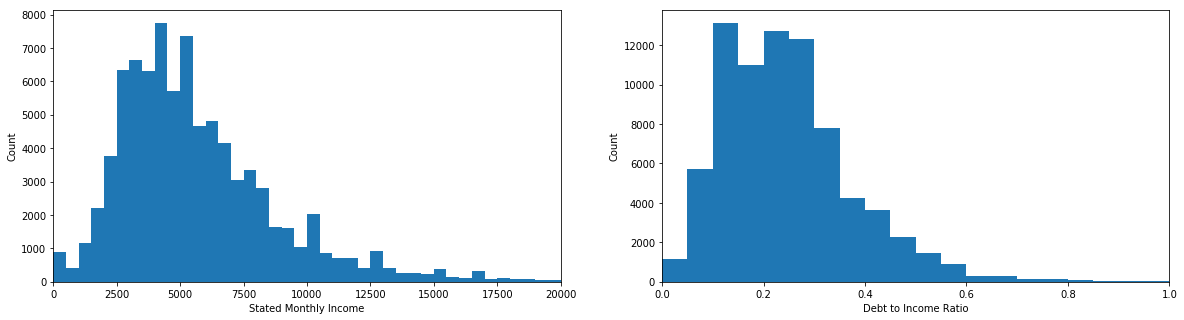

In [23]:
#re-plot the graphs with limitations on x axis.
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
bins1=np.arange(0, df2['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data=df2, x='StatedMonthlyIncome', bins=bins1);
plt.xlim((0, 2e4));
plt.xlabel('Stated Monthly Income');
plt.ylabel('Count');

plt.subplot(1,2,2)
bins2=np.arange(0, df2['DebtToIncomeRatio'].max()+0.05, 0.05)
plt.hist(data=df2, x='DebtToIncomeRatio', bins=bins2);
plt.xlim((0,1.0));
plt.xlabel('Debt to Income Ratio');
plt.ylabel('Count');

Both stated monthly income and debt to income ratio have very similar distribution. It is likely these two variables have strong correlations, and have a correlation with credit score lower range. 

Then, I will look at the next two variables together: employment duration and AvailableBankcardCredit.

In [24]:
df2['EmploymentStatusDuration'].describe()

count    84919.000000
mean       103.006583
std         97.044270
min          0.000000
25%         30.000000
50%         74.000000
75%        147.000000
max        755.000000
Name: EmploymentStatusDuration, dtype: float64

In [25]:
df2['AvailableBankcardCredit'].describe()

count     84938.000000
mean      11403.795310
std       18610.207218
min           0.000000
25%        1148.000000
50%        4578.000000
75%       13918.000000
max      498374.000000
Name: AvailableBankcardCredit, dtype: float64

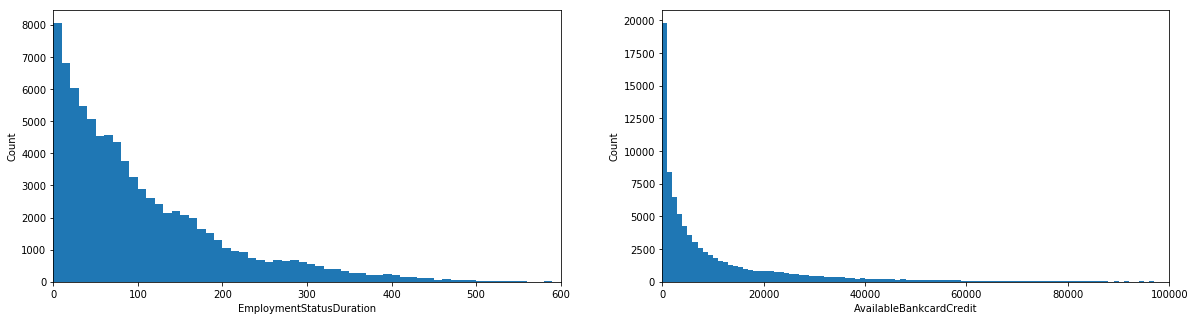

In [26]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
bins3=np.arange(0, df2['EmploymentStatusDuration'].max()+10, 10)
plt.hist(data=df2, x='EmploymentStatusDuration', bins=bins3);
plt.xlim((0, 600));
plt.xlabel('EmploymentStatusDuration');
plt.ylabel('Count');
plt.subplot(1,2,2)
bins4=np.arange(0, df2['AvailableBankcardCredit'].max()+1000, 1000)
plt.hist(data=df2, x='AvailableBankcardCredit', bins=bins4);
plt.xlim((0, 100000));
plt.xlabel('AvailableBankcardCredit');
plt.ylabel('Count');

Both employment status duration and available bank card credit has very similar distribution, with most values in zeros and a very long tail on the right side. These two variables are likely to have strong correlation.

Finally, I will look at the last two variables: borrower's APR and loan amount.

In [27]:
df2['BorrowerAPR'].describe()

count    84938.000000
mean         0.226552
std          0.079929
min          0.045830
25%          0.163240
50%          0.219350
75%          0.292400
max          0.423950
Name: BorrowerAPR, dtype: float64

In [28]:
df2['LoanOriginalAmount'].describe()

count    84938.000000
mean      9077.982175
std       6287.780297
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

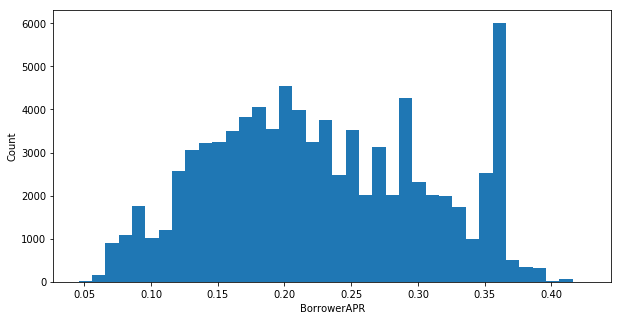

In [29]:
plt.figure(figsize=[10,5])
bins5=np.arange(0.045830, df2['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data=df2, x='BorrowerAPR', bins=bins5);
plt.xlabel('BorrowerAPR');
plt.ylabel('Count');

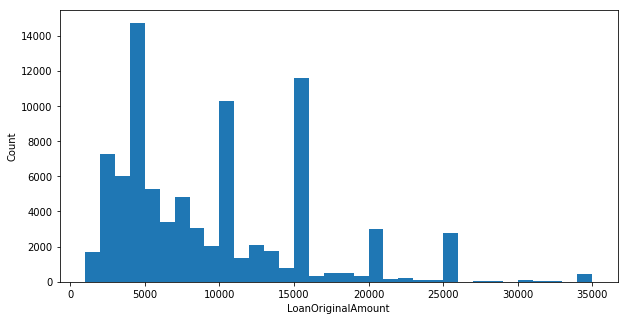

In [30]:
plt.figure(figsize=[10,5])
bins6=np.arange(1000, df2['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data=df2, x='LoanOriginalAmount', bins=bins6);
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Count');

For borrower APR, there are very large spikes at bars with one digit of precision (especially at 0.37). For loan orignal amount, there are very large spikes in frequency at the bars with one digit of precision (e.g. 4000, 10000, 15000, 20000, 25000); frequency quickly trails off until the next spike. These probably represent standard loan amounts.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> LoanStatus has a long-tailed distributions, with most of loans in current status and a few being past due, charged off or defaulted. There are not any unusual points. I converted the counts to proportions so that I can see the percentage clearly for each category.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There are some outlier points when I was discovering Debt to Income ratio variable. These points may be caused by inconsistent recording of numbers or system errors. All these points were removed for safety purpose.

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between features in the data.

In [31]:
numeric_vars=['CreditScoreRangeLower', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'EmploymentStatusDuration', 
              'AvailableBankcardCredit','LoanOriginalAmount', 'BorrowerAPR']
categoric_vars=['LoanStatus','ProsperRating (Alpha)']

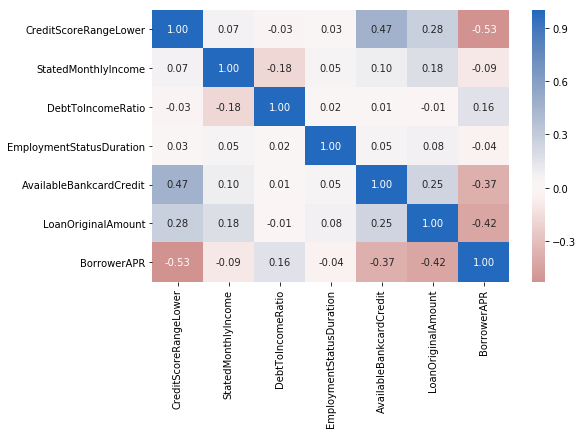

In [32]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df2[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0);

C:\Users\Guwei\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Guwei\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


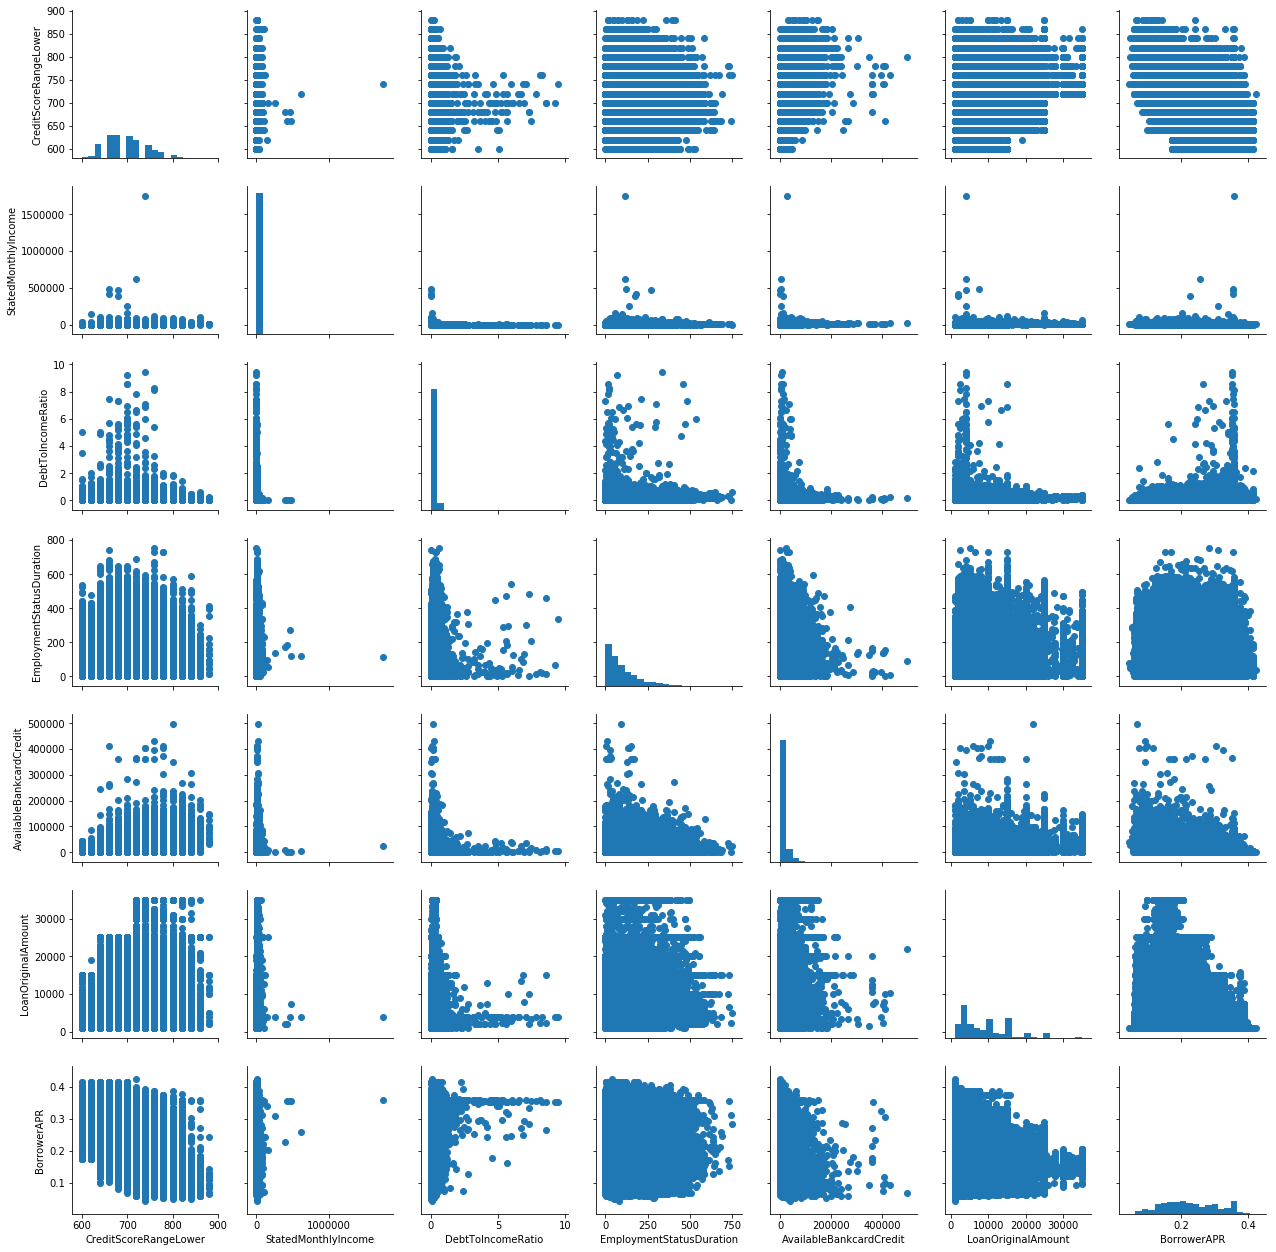

In [33]:
g = sb.PairGrid(data = df2, vars = numeric_vars);
g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

From the graphs above, we can see that borrower APR and credit score lower range have relatively strong negative correlation. Borrower APR also has negative correlation with loan original amount and available bank card credit. There are relatively strong positive correlation between available bank card credit and credit score lower range.

C:\Users\Guwei\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

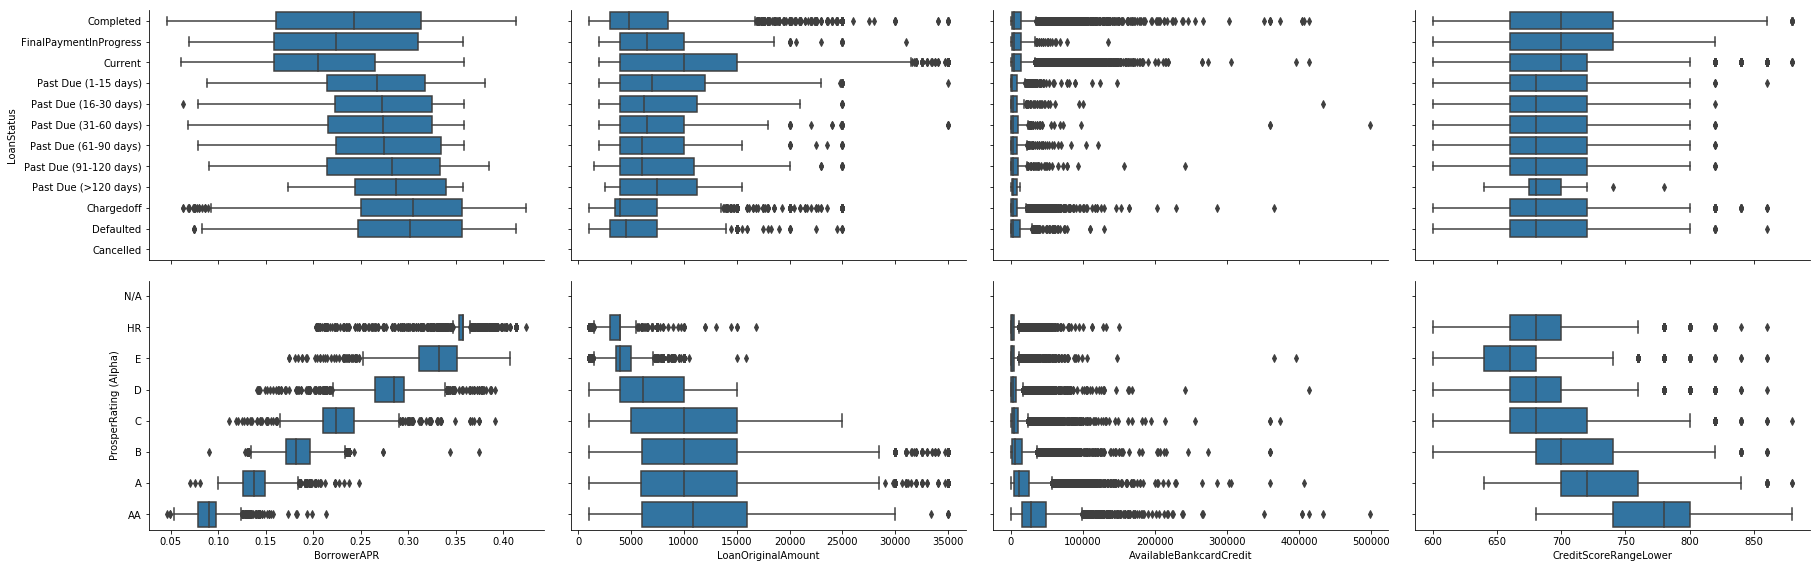

In [45]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df2, x_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'AvailableBankcardCredit',
                                           'CreditScoreRangeLower'], y_vars = categoric_vars,
                size = 4, aspect = 1.5)
g=g.map(boxgrid)

The relationship between prosper rating and the four numeric variables are consistent, with higher rating getting lower APR, higher loan amounts, higher bank card credit, and higher credit score. However, there are some unusual findings for relationship between loan status with the four numeric variables. Past due 91-120 days has lower median APR than other past due days that are smaller. Past due 16-30 days has the second highest median borrower APR following defaulted, higher than that of chargedoff. Surprisingly, past due 91-120 day has the highest median loan amount. Past due 1-15 days has the lowest credit score comparing to defaulted or charged off. These need further investigation.

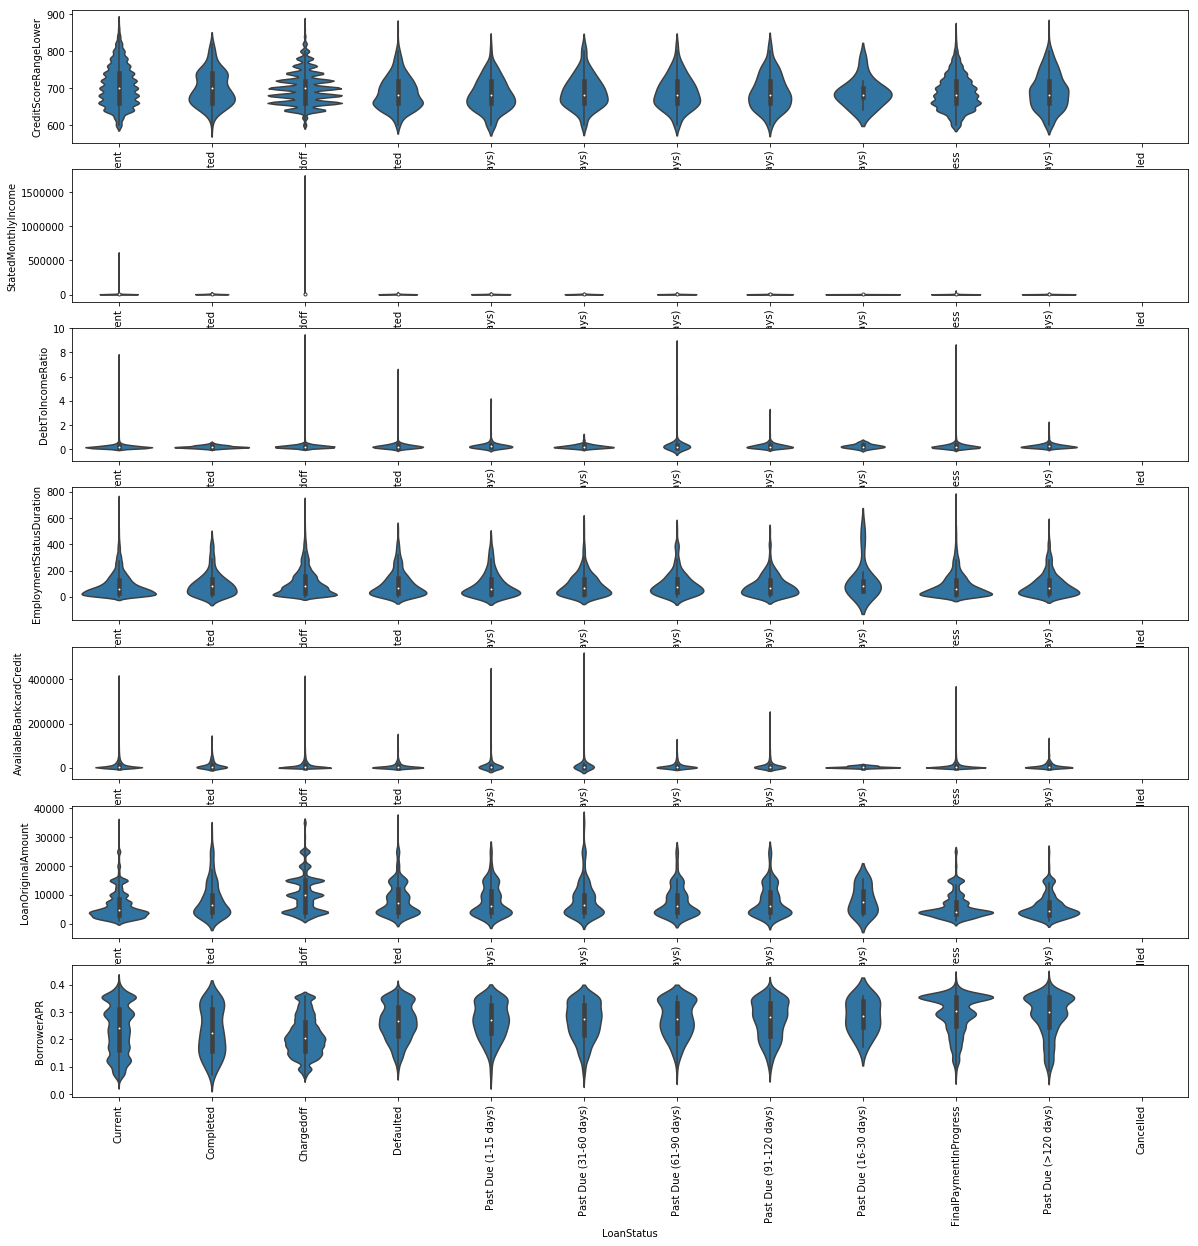

In [37]:
#look at the violin plots between loan status (categorical) vs other quantitative variables
fig, ax = plt.subplots(ncols = 1, nrows= 7, figsize = [20,20])

for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sb.violinplot(data = df2, y = var, x = 'LoanStatus', color=base_color, ax = ax[i]);
    ax[i].set_xticklabels(labels, rotation=90);

From the violin plot above, we can see that the chargedoff category has the widest range of monthly income and debt to income ratio. Past due 31-60 days has the widest range of available bank card credit and loan amount. 

Finally, let's look at relationships between the two categorical features.

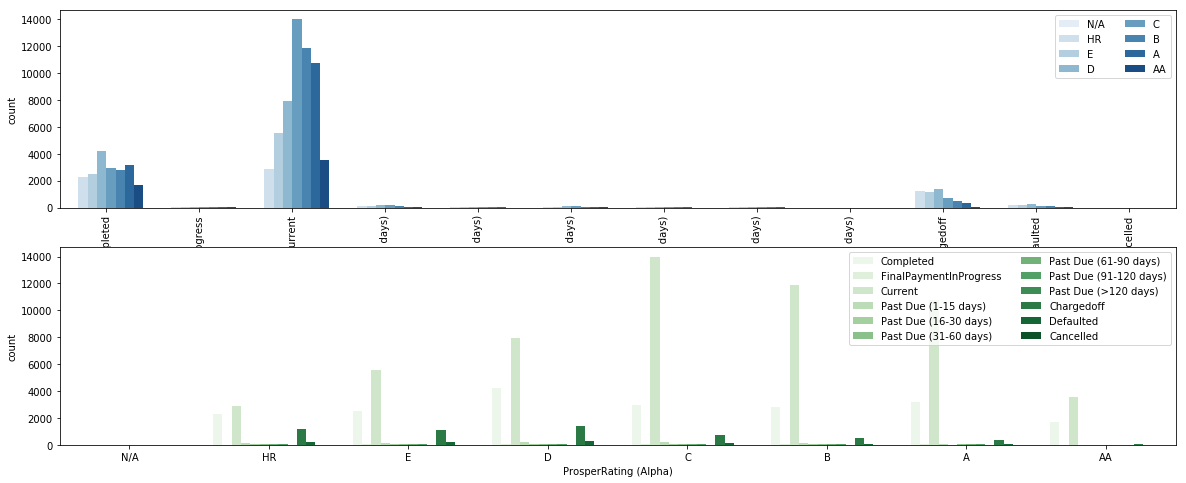

In [91]:
plt.figure(figsize = [20, 8])
ax=plt.subplot(2,1,1)
sb.countplot(data = df2, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues');
plt.xticks(rotation=90);
ax.legend(loc = 1, ncol = 2);
ax1=plt.subplot(2,1,2)
sb.countplot(data = df2, x = 'ProsperRating (Alpha)', hue = 'LoanStatus', palette = 'Greens');
ax1.legend(loc = 1, ncol = 2);

Surprisingly, there are not too much relationship between loan status and prosper rating. Although there are relatively more percentage of people with ratings of HR, E and D in chargedoff and defaulted loans than in completed and current loans. Loans in each rating have a wide range of loan status.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
There are some unusual findings for relationship between loan status with the three numeric variables: borrower APR, credit score lower range, and loan amount. Past due 91-120 days has lower median APR than other past due days that are smaller. Past due 16-30 days has the second highest median borrower APR following defaulted, higher than that of chargedoff. Surprisingly, past due 91-120 day has the highest median loan amount, higher than chargedoff and defaulted. Past due 1-15 days has the lowest credit score comparing to defaulted or charged off. Prosper ratings has no big relationship to loan status. It seems like people with all kinds of rating will complete the loan or default on the loan. The same applies to credit score lower range. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
I found that borrower APR and credit score lower range have relatively strong negative correlation. Borrower APR also has negative correlation with loan original amount and available bank card credit. There are relatively strong positive correlation between available bank card credit and credit score lower range.


## Multivariate Exploration

C:\Users\Guwei\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


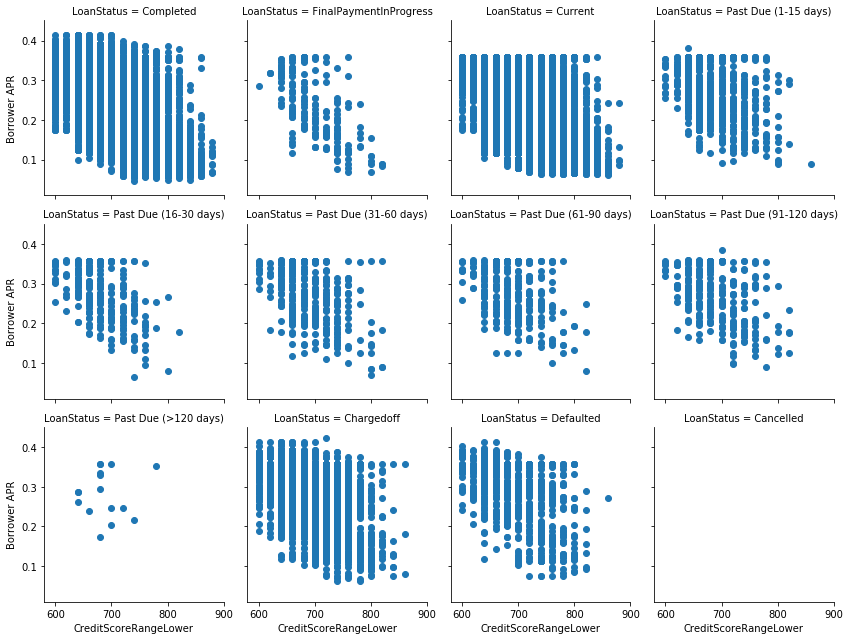

In [89]:
# create faceted scatter plots on levels of the loan status
g = sb.FacetGrid(data = df2, col = 'LoanStatus', col_wrap = 4, size = 3)
g.map(plt.scatter,'CreditScoreRangeLower', 'BorrowerAPR')
g.set_xlabels('CreditScoreRangeLower')
g.set_ylabels('Borrower APR')


From the scatter plots above, we can see that the final payment in progress category has the strongest relationship between borrower APR and credit score. The past due >120 days category has the weakest relationship between borrower APR and credit score.

C:\Users\Guwei\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Guwei\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


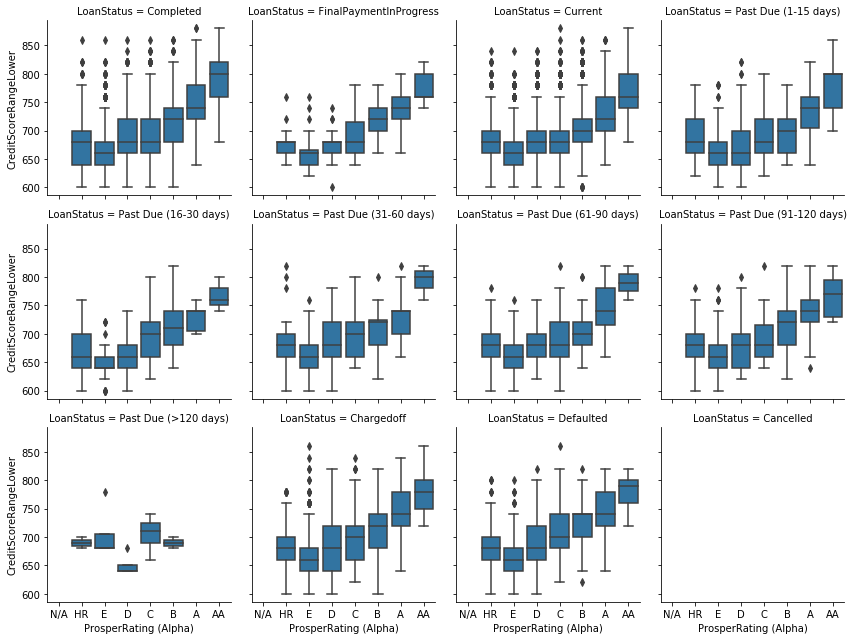

In [40]:
g = sb.FacetGrid(data = df2, col = 'LoanStatus', col_wrap = 4, size = 3)
g.map(sb.boxplot,'ProsperRating (Alpha)', 'CreditScoreRangeLower');
g.set_xlabels('ProsperRating (Alpha)')
g.set_ylabels('CreditScoreRangeLower')

From the box plots above, we can see surprisingly HR (high risk) rating actually has higher credit score than rating E, which is the next riskiest rating, and about the same credit score with rating D. 

Now, let's see their relationship with borrower's APR.

C:\Users\Guwei\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Guwei\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


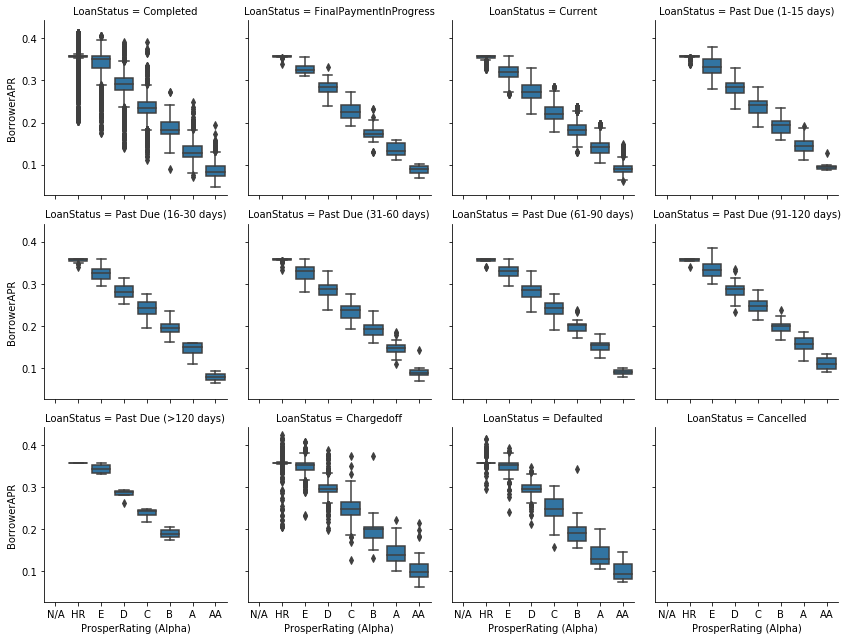

In [43]:
g = sb.FacetGrid(data = df2, col = 'LoanStatus', col_wrap = 4, size = 3)
g.map(sb.boxplot,'ProsperRating (Alpha)', 'BorrowerAPR');
g.set_xlabels('ProsperRating (Alpha)')
g.set_ylabels('BorrowerAPR')

From the box plots above, we can see that the borrower APR are aligned with my thoughts, with HR rating having highest APR, and AA rating having the lowest APR. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
The final payment in progress category has the strongest relationship between borrower APR and credit score. The past due >120 days category has the weakest relationship between borrower APR and credit score. HR rating has highest APR, and AA rating having the lowest APR. 

### Were there any interesting or surprising interactions between features?

HR (high risk) rating actually has higher credit score than rating E, which is the next riskiest rating, and about the same credit score with rating D. 